# Домашнее задание №6
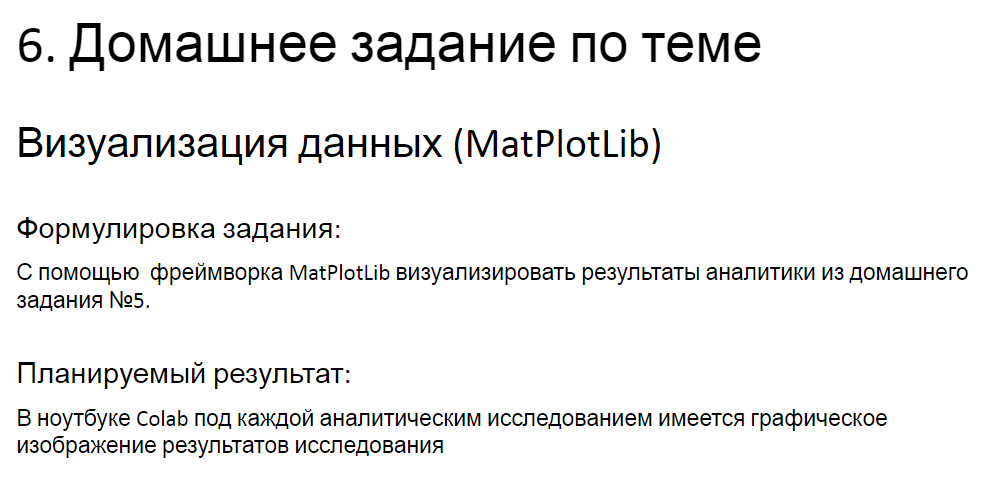

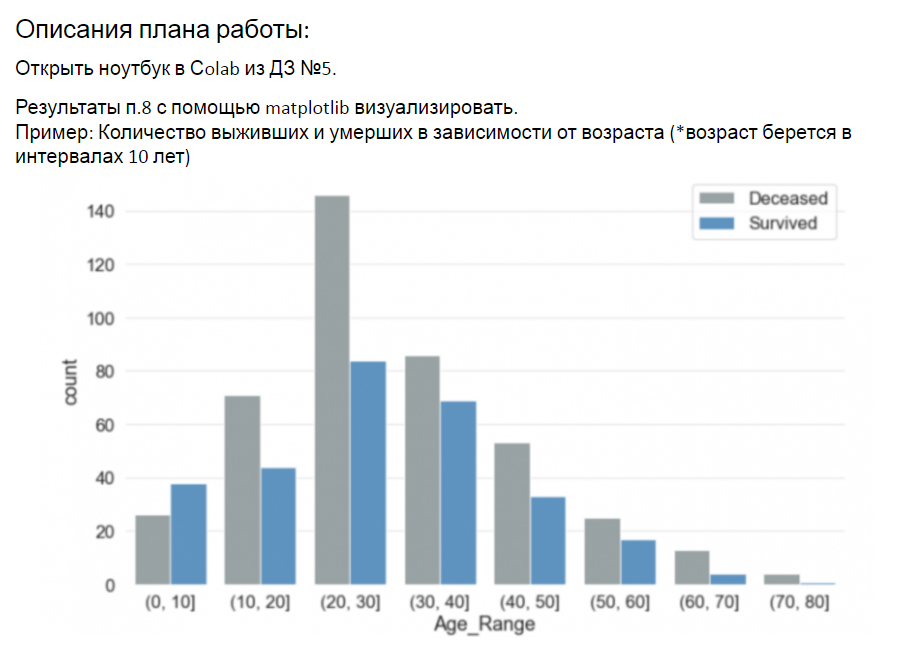

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [16]:
dataset = df.copy(deep = True) #создаем копию датасета
median_Age = dataset.Age.median() # используется стратегия замены медианным значением пустых значений

dataset = dataset.fillna({'Cabin':'A0', 'Embarked':'A', 'Age':median_Age}) # т.к. данных по каюте и порту посадки у нас по некоторым пассажирам нет, а вычислить среднее или медианное значение невозможно, принято решение подставить по ним константы, отличающиеся от иных значений
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,A0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,A0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Данные анализируемые в ДЗ №5

In [13]:
df_part_SP = dataset[['Pclass', 'Survived']]
survived_pclass_rate = df_part_SP.groupby('Pclass').apply(lambda x: (len(x[x['Survived'] == 1])/len(x), len(x[x['Survived'] == 1]), len(x)))


for i, rate in survived_pclass_rate.items():
  print(f'с классом круиза {i} доля выживших: {rate[0]}, общее число выживших в данном классе: {rate[1]}, общее число пассажиров в данном классе: {rate[2]}')

с классом круиза 1 доля выживших: 0.6296296296296297, общее число выживших в данном классе: 136, общее число пассажиров в данном классе: 216
с классом круиза 2 доля выживших: 0.47282608695652173, общее число выживших в данном классе: 87, общее число пассажиров в данном классе: 184
с классом круиза 3 доля выживших: 0.24236252545824846, общее число выживших в данном классе: 119, общее число пассажиров в данном классе: 491


In [17]:
# Создадим список с диапазонами возрастов, где значение = предельному значению возраста в диапазоне
Age_range = []
for row in dataset['Age']:
        if row <= 10.0 :    Age_range.append(10)
        elif row <= 20.0:   Age_range.append(20)
        elif row <= 30.0:   Age_range.append(30)
        elif row <= 40.0:   Age_range.append(40)
        elif row <= 50.0:   Age_range.append(50)
        elif row <= 60.0:  Age_range.append(60)
        elif row <= 70.0:   Age_range.append(70)
        elif row <= 80.0:  Age_range.append(80)

        else:           Age_range.append('Not_Rated')

In [18]:
# Добавим список как столбейц в таблицу
dataset['Age_range'] = Age_range
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A0,S,30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A0,S,30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A0,S,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,A0,S,30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,A0,S,30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30


In [19]:
df_part_SAR = dataset[['Age_range', 'Survived']]
survived_age_range_rate = df_part_SAR.groupby('Age_range').apply(lambda x: (len(x[x['Survived'] == 1])/len(x), len(x[x['Survived'] == 1]), len(x)))


for i, rate in survived_age_range_rate.items():
  print(f'в возрасте до {i} лет доля выживших: {rate[0]}, общее число выживших в данном диапазоне: {rate[1]}, общее число пассажиров в данном диапазоне: {rate[2]}')

в возрасте до 10 лет доля выживших: 0.59375, общее число выживших в данном диапазоне: 38, общее число пассажиров в данном диапазоне: 64
в возрасте до 20 лет доля выживших: 0.3826086956521739, общее число выживших в данном диапазоне: 44, общее число пассажиров в данном диапазоне: 115
в возрасте до 30 лет доля выживших: 0.33415233415233414, общее число выживших в данном диапазоне: 136, общее число пассажиров в данном диапазоне: 407
в возрасте до 40 лет доля выживших: 0.44516129032258067, общее число выживших в данном диапазоне: 69, общее число пассажиров в данном диапазоне: 155
в возрасте до 50 лет доля выживших: 0.38372093023255816, общее число выживших в данном диапазоне: 33, общее число пассажиров в данном диапазоне: 86
в возрасте до 60 лет доля выживших: 0.40476190476190477, общее число выживших в данном диапазоне: 17, общее число пассажиров в данном диапазоне: 42
в возрасте до 70 лет доля выживших: 0.23529411764705882, общее число выживших в данном диапазоне: 4, общее число пассажир

In [20]:
df_part_SS = dataset[['Sex', 'Survived']]
survived_sex_rate = df_part_SS.groupby('Sex').apply(lambda x: (len(x[x['Survived'] == 1])/len(x), len(x[x['Survived'] == 1]), len(x)))


for i, rate in survived_sex_rate.items():
  print(f'доля выживших {i}: {rate[0]}, общее число выживших данного пола: {rate[1]}, общее число пассажиров данного пола: {rate[2]}')

доля выживших female: 0.7420382165605095, общее число выживших данного пола: 233, общее число пассажиров данного пола: 314
доля выживших male: 0.18890814558058924, общее число выживших данного пола: 109, общее число пассажиров данного пола: 577


In [29]:
Relatives = dataset.SibSp + dataset.Parch
dataset['Relatives'] = Relatives
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A0,S,30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A0,S,30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A0,S,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,A0,S,30,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,20,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,A0,S,30,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30,0


In [94]:
df_part_SSP = dataset[['Relatives', 'Survived']]
survived_relatives_rate = df_part_SSP.groupby(['Relatives']).apply(lambda x: (len(x[x['Survived'] == 1])/len(x), len(x[x['Survived'] == 1]), len(x)))


for i, rate in survived_relatives_rate.items():
  print(f'доля выживших с родственниками в количестве {i} человек на борту: {rate[0]}, общее число выживших с данным количеством родни на борту: {rate[1]}, общее число пассажиров с данным количеством родни на борту: {rate[2]}')

доля выживших с родственниками в количестве 0 человек на борту: 0.30353817504655495, общее число выживших с данным количеством родни на борту: 163, общее число пассажиров с данным количеством родни на борту: 537
доля выживших с родственниками в количестве 1 человек на борту: 0.5527950310559007, общее число выживших с данным количеством родни на борту: 89, общее число пассажиров с данным количеством родни на борту: 161
доля выживших с родственниками в количестве 2 человек на борту: 0.5784313725490197, общее число выживших с данным количеством родни на борту: 59, общее число пассажиров с данным количеством родни на борту: 102
доля выживших с родственниками в количестве 3 человек на борту: 0.7241379310344828, общее число выживших с данным количеством родни на борту: 21, общее число пассажиров с данным количеством родни на борту: 29
доля выживших с родственниками в количестве 4 человек на борту: 0.2, общее число выживших с данным количеством родни на борту: 3, общее число пассажиров с данн

In [32]:
#разделим выборку по выживанию
isSurvived = dataset['Survived'] == 1
isDied = dataset['Survived'] == 0

dataset_survived = dataset.loc[isSurvived]
dataset_died = dataset.loc[isDied]

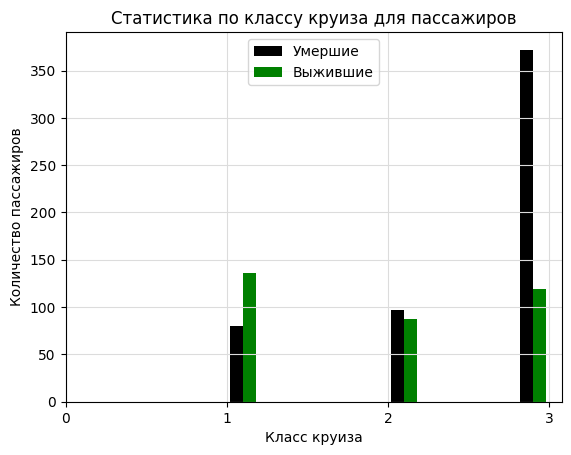

In [87]:
# Визуализация корреляции класса круиза и количеста выживших/погибших
PCLASS_CAT_COUNT = 4

fig, ax = plt.subplots()

data_to_plot_pclass = [dataset_died['Pclass'], dataset_survived['Pclass']]

xtick = [i for i in range(PCLASS_CAT_COUNT)]

plt.hist(data_to_plot_pclass, color = ['black', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper center')
plt.xlabel("Класс круиза")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по классу круиза для пассажиров")
plt.grid(color="gainsboro") # Сетка
ax.set_xticks(xtick)
plt.show()

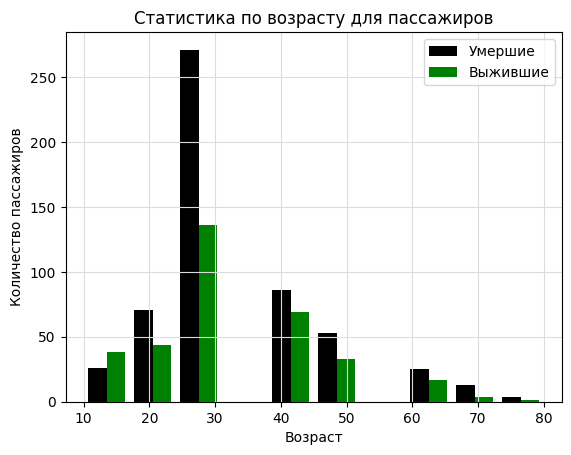

In [88]:
# Визуализация корреляции возраста и количеста выживших/погибших
data_to_plot_age = [dataset_died['Age_range'], dataset_survived['Age_range']]
plt.hist(data_to_plot_age, color = ['black', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper right')
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по возрасту для пассажиров")
plt.grid(color="gainsboro") # Сетка
plt.show()

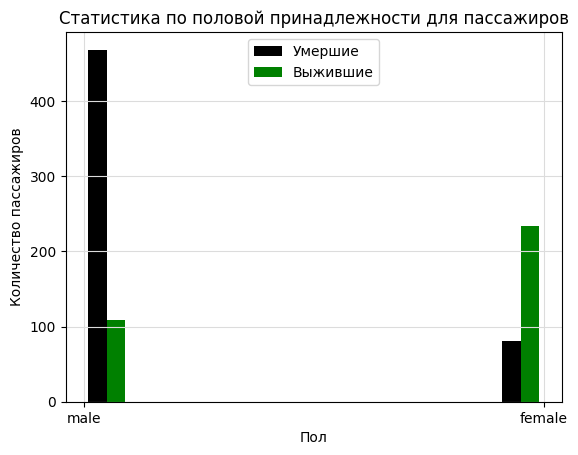

In [92]:
# Визуализация корреляции половой принадлежности и количеста выживших/погибших
SEX_CAT_COUNT = 2

fig, ax = plt.subplots()

data_to_plot_sex = [dataset_died['Sex'], dataset_survived['Sex']]

xtick = [i for i in range(SEX_CAT_COUNT)]

plt.hist(data_to_plot_sex, color = ['black', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper center')
plt.xlabel("Пол")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по половой принадлежности для пассажиров")
plt.grid(color="gainsboro") # Сетка
ax.set_xticks(xtick)
plt.show()

1.0


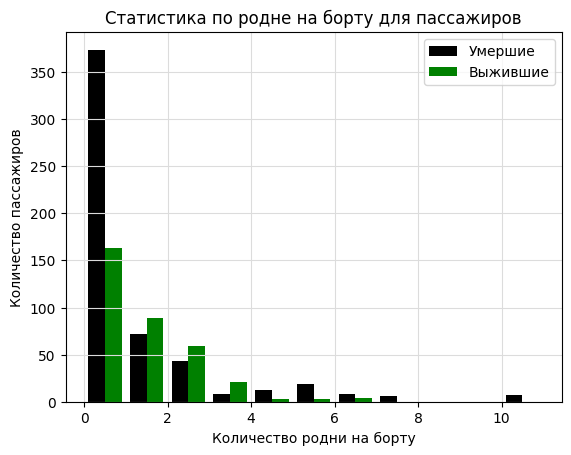

In [101]:
# Визуализация корреляции количества родственников на борту и количеста выживших/погибших
data_to_plot_age = [dataset_died['Relatives'], dataset_survived['Relatives']]
x_points, step = np.linspace(0, 11, 12, retstep=True)
print (step)
plt.hist(data_to_plot_age, x_points, color = ['black', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper right')
plt.xlabel("Количество родни на борту")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по родне на борту для пассажиров")
plt.grid(color="gainsboro") # Сетка
plt.show()